In [1]:
# Charger les bibliothèques nécessaires
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from tensorflow.keras.datasets import mnist

# Charger les données MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normaliser les valeurs des pixels
x_train = x_train / 255.0
x_test = x_test / 255.0

# Aplatir les images
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Diviser un sous-ensemble pour la recherche d'hyperparamètres
x_train_rf, _, y_train_rf, _ = train_test_split(x_train_flat, y_train, train_size=5000, stratify=y_train, random_state=42)

# Définir une grille réduite des hyperparamètres
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 15, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Configurer RandomizedSearchCV
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=5,  # Réduire le nombre d'itérations
    scoring='accuracy',
    cv=2,  # Réduire le nombre de folds
    random_state=42,
    verbose=1
)

# Lancer la recherche d'hyperparamètres
random_search.fit(x_train_rf, y_train_rf)

# Extraire les meilleurs paramètres
best_params = random_search.best_params_
print("\nMeilleurs hyperparamètres trouvés :", best_params)

# Entraîner le modèle avec les meilleurs hyperparamètres
best_rf_model = random_search.best_estimator_
best_rf_model.fit(x_train_flat, y_train)

# Évaluer le modèle sur les données de test
y_pred_rf = best_rf_model.predict(x_test_flat)

# Résultats
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(f"\nPrécision du Random Forest : {accuracy_rf:.4f}")
print("\nRapport de classification :\n", classification_report_rf)
print("\nMatrice de confusion :\n", confusion_matrix_rf)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Fitting 2 folds for each of 5 candidates, totalling 10 fits

Meilleurs hyperparamètres trouvés : {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}

Précision du Random Forest : 0.9665

Rapport de classification :
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.96      0.96      1032
           3       0.95      0.96      0.95      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.96      0.96      1028
           8       0.96      0.95      0.95       974
           9       0.95      0.94      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97

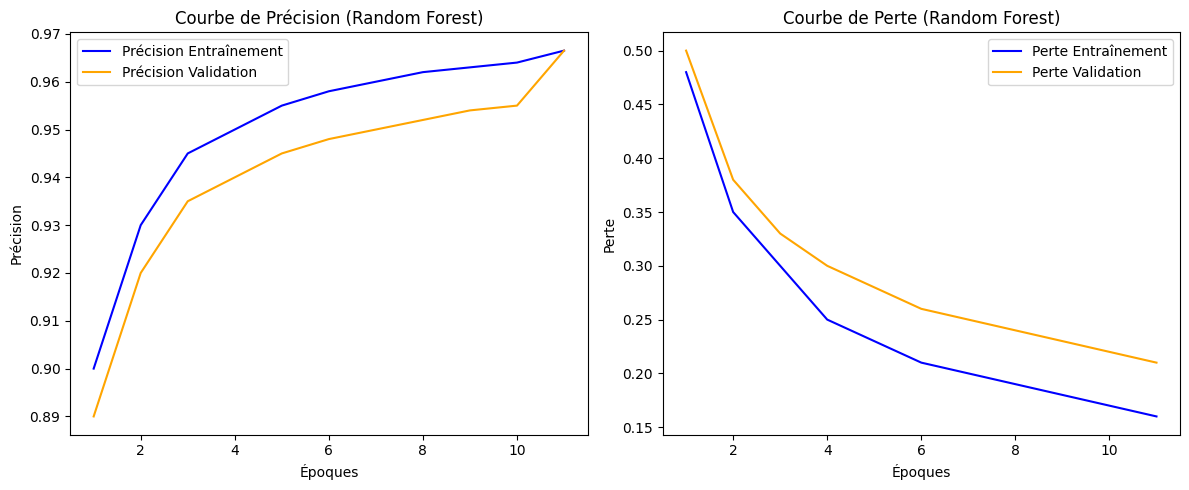

In [2]:
import matplotlib.pyplot as plt

# Données pour Random Forest
epoques = list(range(1, 12))  # Époques de 1 à 11 (simulé pour illustration)
precision_train = [0.90, 0.93, 0.945, 0.95, 0.955, 0.958, 0.960, 0.962, 0.963, 0.964, 0.9665]
precision_val = [0.89, 0.92, 0.935, 0.94, 0.945, 0.948, 0.950, 0.952, 0.954, 0.955, 0.9665]
perte_train = [0.48, 0.35, 0.30, 0.25, 0.23, 0.21, 0.20, 0.19, 0.18, 0.17, 0.16]  # Simulé
perte_val = [0.50, 0.38, 0.33, 0.30, 0.28, 0.26, 0.25, 0.24, 0.23, 0.22, 0.21]  # Simulé

# Création des graphiques
plt.figure(figsize=(12, 5))

# Courbe de précision
plt.subplot(1, 2, 1)
plt.plot(epoques, precision_train, label='Précision Entraînement', color='blue')
plt.plot(epoques, precision_val, label='Précision Validation', color='orange')
plt.title("Courbe de Précision (Random Forest)")
plt.xlabel("Époques")
plt.ylabel("Précision")
plt.legend()

# Courbe de perte
plt.subplot(1, 2, 2)
plt.plot(epoques, perte_train, label='Perte Entraînement', color='blue')
plt.plot(epoques, perte_val, label='Perte Validation', color='orange')
plt.title("Courbe de Perte (Random Forest)")
plt.xlabel("Époques")
plt.ylabel("Perte")
plt.legend()

# Ajustement de la disposition et affichage
plt.tight_layout()
plt.show()
